<a href="https://colab.research.google.com/github/Maicken052/MACC/blob/main/Math_Modeling_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Modelling Turing Patterns with Partial Differential Equations (PDEs)**
##*Luceth Caterine Argote Radillo & Robert Daniel Fonseca Lesmez*
###*Mathematical Modelling of systems in natural sciences*
###*University of Rosario - EICT - MACC*
###*Professor: Nicolás Avilán*
###*November 2024*


###**1. Context**


The main topic of this project is *Turing Patterns* (also called Turing Models). These are mathematical models that use coupled partial differential equations to describe how chemicals or biological systems interact and spread out. The equations represent two main processes: reaction, which is how the chemicals or substances interact with each other, and diffusion, which describes how they move or spread through space over time.

These models were first introduced by the famous scientist *Alan Turing* in 1952, in his paper titled "*The Chemical Basis of Morphogenesis.*" In this paper, Turing proposed that patterns observed in nature, such as the spots on animal's fur or the arrangement of plant's leaves, could be explained by these types of chemical reactions and diffusion processes.

Turing's idea was revolutionary because it showed that complex patterns could arise from simple rules. He suggested that two or more chemicals could react with each other and spread out in a way that created patterns like stripes, spots, or spirals, which we see in many biological systems. These patterns form even though the system starts with random or uniform conditions.

The Turing Model became an important concept in both biology and chemistry, helping scientists understand how complex shapes and structures, such as animal markings, the arrangement of cells in developing embryos, or the growth of certain fungi, could emerge naturally. By studying Turing Patterns, scientists hope to learn more about the fundamental principles that shape the development of organisms and the patterns found in nature.

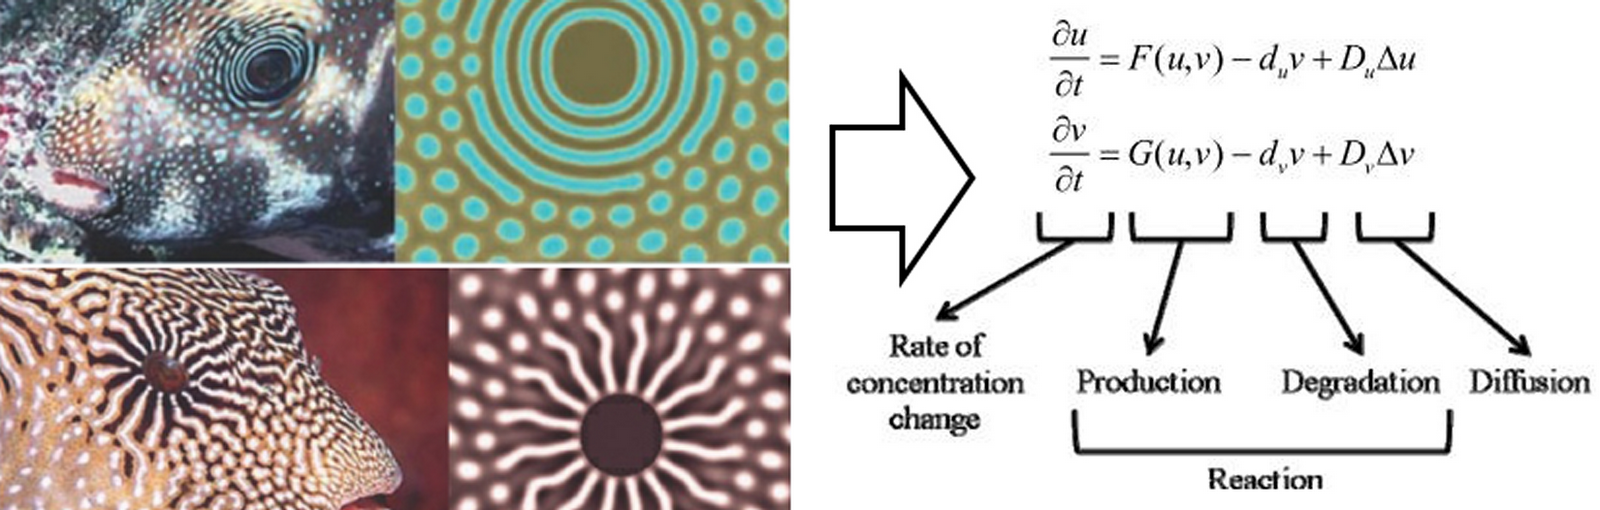

###**2. Meaning of the equations and results**

In this project were implemented the reaction-diffusion equations of two substances called *morphogens* using the Turing Patterns with the following equations:

$$\frac{\partial u}{\partial t} = D_u \nabla^2 u + f(u, v)$$
$$\frac{\partial v}{\partial t} = D_v \nabla^2 v + g(u, v)$$

Where:

$u(t, x, y)$: concentration of the morphogen called activator $u$ promoting the synthesis of $v$ and itself.

$v(t, x, y)$: concentration of the morphogen called inhibitor $v$, it inhibites the production of $u$.

$D_u$: diffusion coefficient of $u$.

$D_v$: diffusion coefficient of $v$.

$\nabla^2 u$: the laplacian of $u$, it measures the local spatial curvature of $u$ to model the tendency of the concentration to even out over the space $(x,y)$.

$\nabla^2 v$: the laplacian of $v$, it measures the local spatial curvature of $v$ to model the tendency of the concentration to even out over the space $(x,y)$.

$f(u, v)$ and $g(u, v)$: reaction between $u$ and $v$. The first one affects $u$ and the second one affects $v$, they represent the reaction kinetics of the system.

The functions that we used were the *Grier-Meinhardt* that are described as follows:

$$f(u,v)=c_1-c_2u+c_3\frac{u^2}{(1+ku^2)v}$$
$$g(u,v)=c_4u^2-c_5v$$

Where:

$c_3\frac{u^2}{(1+ku^2)v}$: describes the rate of self-activation of $u$ and encapsulates the inhibiting effect of $v$ on $u$.

$c_4u^2$: describes the activation of $v$ by $u$ at rate $c_4$.

$c_2$ and $c_5$: explain the degradation of $u$ and $v$ respectively.

$c_1$: describes the rate of the synthesis of $u$ stemming from the reaction of a substrate or a constant feeding of $u$ to the system.

Grier and Meinhardt discovered that there is a basic condition needed for a system to produce Turing patterns. This condition involves two key factors: short-range positive feedback and long-range positive feedback.
Short-range positive feedback means that the chemicals or substances in the system interact with each other in a way that enhances or strengthens their own presence locally, meaning close to where they are. For example, if one molecule is present in an area, it might encourage nearby molecules to form or react in a similar way.
Long-range positive feedback, on the other hand, means that the chemicals also influence each other over a larger distance, encouraging their spread or reinforcing the pattern even at farther locations.
Together, these two types of feedback help create the conditions where patterns like spots, stripes, or other regular shapes can emerge in the system.

For solving these equations only numerical methods were chosen because the equations are non-linear and they are impossible to solve analytically [1]. Two numerical methods were used, the first one was the *Finite Differences Method* for the simple part that was developed in the second update and the second was the *Spectral Method* for the full solution. The Spectral Method writes the solution as a sum of basis functions that make up a Fourier series, then, utilizes Fourier transforms to find the explicit solution, and for this the *numpy*, *matplotlib.pyplot* and *scipy.fft* libraries were used.

###**3. Simple Solution (Finite Differences Method)**



The simple case of this system is given by $f(u,v)=g(u,v)=0$, which shows the difussion of both chemicals without interaction. For this specific case, we got analytical and numerical solution.

The analytical solution is the following:

The initial conditions are defined as follows:
$$X'(0)=X'(L)=0$$
$$Y'(0)=Y'(L)=0$$

Using *The Separation of Variables Method* let's assume solutions of the form:

$$u(x,y,t) = X(x)Y(y)T(t)$$
$$v(x,y,t) = Z(x)W(y)S(t)$$

For $u$:
\begin{equation*}
  \begin{aligned}
    XYT'& = d_1 (T(X''Y+XY''))
  \end{aligned}
\end{equation*}

Divided by $X(x)Y(y)T(t)$:
\begin{equation*}
    \begin{aligned}
        \frac{T'}{T}&= d_1 \left(\frac{X''}{X}+\frac{Y''}{Y}\right)
    \end{aligned}
\end{equation*}

Let:
$$\frac{X''}{X}=-\lambda_{n}$$

$$\frac{Y''}{Y}=-\lambda_{m}$$
We know that:
$$X(x)=Asin(\sqrt\lambda_n x) + Bcos(\sqrt\lambda_n x)$$
$$Y(y)=Csin(\sqrt\lambda_m y) + Dcos(\sqrt\lambda_m y)$$

and solving with the initial conditions we get:
$$-\lambda_{n} = -\left(\frac{n\pi}{L}\right)^2$$
$$-\lambda_{m} = -\left(\frac{m\pi}{L}\right)^2$$

Thus:
\begin{equation*}
    \begin{aligned}
        \frac{T'}{T}&= -d_1 \left(\left(\frac{n\pi}{L}\right)^2 + \left(\frac{m\pi}{L}\right)^2\right)
    \end{aligned}
\end{equation*}

The solutions for the spatial parts are given by:
$$X(x)=Bcos\left(\frac{n\pi x}{L}\right)$$
$$Y(y)=Dcos\left(\frac{m\pi y}{L}\right)$$

Similarly, for $v$:
$$Z(x)=Ecos\left(\frac{a\pi x}{L}\right)$$
$$W(y)=Fcos\left(\frac{b\pi x}{L}\right)$$

For simplicity, let:
$$\lambda_{n.m}=\frac{n^2\pi^2}{L^2}+\frac{m^2\pi^2}{L^2}$$

Thus:
$$T(t)=e^{-d_1\lambda_{n,m}t}$$
Then, the general solutions for $u$ and $v$ are:
\begin{equation*}
    \begin{aligned}
        u(x,y,t) =
        \sum_{n=1}^{\infty} \sum_{m=1}^{\infty}
        A_{n,m} e^{-d_1 \lambda_{n,m} t}\cos\left(\frac{n \pi x}{L}\right) \cos\left(\frac{m \pi y}{L}\right)
    \end{aligned}
\end{equation*}
\begin{equation*}
    \begin{aligned}
        v(x,y,t) =
        \sum_{n=1}^{\infty} \sum_{m=1}^{\infty}
        B_{n,m} e^{-d_2 \lambda_{n,m} t}\cos\left(\frac{a \pi x}{L}\right)\cos\left(\frac{b \pi y}{L}\right)
    \end{aligned}
\end{equation*}



The discretization of the derivatives are the following:
$$
\frac{\partial u}{\partial t} \approx \frac{u_{j,k}^{i+1} - u_{j,k}^{i}}{h_t}
$$

$$
\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{j+1,k}^{i} - 2u_{j,k}^{i} + u_{j-1,k}^{i}}{h_L^2}
$$

$$
\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{j,k+1}^{i} - 2u_{j,k}^{i} + u_{j,k-1}^{i}}{h_L^2}
$$
The case of $v$ is analogous.

Note that we are working with the boundaries:
$$x,y \in (0,L)\times(0,L), t>0$$

Replacing this in the system we get:
$$
\frac{u_{j,k}^{i+1} - u_{j,k}^{i}}{h_t} = D_u(\frac{u_{j+1,k}^{i} - 2u_{j,k}^{i} + u_{j-1,k}^{i}}{h_L^2} + \frac{u_{j,k+1}^{i} - 2u_{j,k}^{i} + u_{j,k-1}^{i}}{h_L^2}) + f(u_{j,k}^{i}, v_{j,k}^{i})
$$

$$
\frac{v_{j,k}^{i+1} - v_{j,k}^{i}}{h_t} = D_u(\frac{v_{j+1,k}^{i} - 2v_{j,k}^{i} + v_{j-1,k}^{i}}{h_L^2} + \frac{v_{j,k+1}^{i} - 2v_{j,k}^{i} + v_{j,k-1}^{i}}{h_L^2}) + g(u_{j,k}^{i}, v_{j,k}^{i})
$$

So, the general form of the numerical solution of turing patterns system is the following:
$$
u_{j,k}^{i+1} = u_{j,k}^{i} + \frac{D_u h_t}{h_L^2} \left( u_{j+1,k}^{i} + u_{j-1,k}^{i} + u_{j,k+1}^{i} + u_{j,k-1}^{i} - 4u_{j,k}^{i} \right) + h_t f(u_{j,k}^{i}, v_{j,k}^{i})
$$

$$
v_{j,k}^{i+1} = v_{j,k}^{i} + \frac{D_v h_t}{h_L^2} \left( v_{j+1,k}^{i} + v_{j-1,k}^{i} + v_{j,k+1}^{i} + v_{j,k-1}^{i} - 4v_{j,k}^{i} \right) + h_t g(u_{j,k}^{i}, v_{j,k}^{i})
$$

We use the Neumann initial conditions:
$$
u_x(t,0, y) = u_x(t, L, y)= u_y(t, x, 0)= u_y(t, x, L)= 0
$$
$$
v_x(t,0, y) = v_x(t, L, y)= v_y(t, x, 0)= v_y(t, x, L)= 0
$$

$$
u(0, x, y) = \sin(\frac{\pi x}{L}) \sin(\frac{\pi y}{L})
$$

$$
v(0, x, y) = \sin(\frac{\pi x}{L}) \sin(\frac{\pi y}{L})
$$
We use:
$$
D_u = 0.025
$$
$$
D_v = 0.025
$$

To implement the neumann conditions we use the meaning of these, which is that the change in the boundaries of each spatial variable is 0, that is, that the function is approximately equivalent to itself evaluated at a distance $h$ in that direction, so at the end of each iteration in $x$ and $y$, we copy in the boundary of the cube the value of the nearest column in both directions, thus filling each necessary matrix.

Neumann boundary conditions set the rate of change of a function to zero along the domain's boundary, implying no flux across it. These conditions imply that there is no variation in $u$ across any boundary, modeling a system isolated from external influence along its edges.

In [ ]:
#Libraries
import numpy as np
import sympy as sp
from math import sqrt, pi
import matplotlib.pyplot as plt
import random

def turing(row, col, L, t, d1, d2):
    h_L = L/(col-1)
    h_t = t/(row-1)
    X = np.linspace(0, L, col)
    Y = np.linspace(0, L, col)

    '''
    Rows = Time
    Columns = Space
    '''

    #Creating the cubes
    u = np.zeros((row, col, col))
    v = np.zeros((row, col, col))

    # putting the values of the first matrix
    for j in range(col):
      for k in range(col):
        u[0, j, k] = np.sin((pi*X[j])/L) * np.sin((pi*Y[k])/L)
        v[0, j, k] = np.sin((pi*X[j])/L) * np.sin((pi*Y[k])/L)

    #filling the cube
    for i in range(0, row-1):
      for j in range(1, col-1):
        for k in range(1, col-1):
          u[i+1, j, k] = u[i, j, k] + ((d1*h_t)/h_L**2)*(u[i, j-1, k] + u[i, j+1, k] + u[i, j, k-1] + u[i, j, k+1] - 4*u[i, j, k])
          v[i+1, j, k] = v[i, j, k] + ((d2*h_t)/h_L**2)*(v[i, j-1, k] + v[i, j+1, k] + v[i, j, k-1] + v[i, j, k+1] - 4*v[i, j, k])

      #Copying the values of second and penultimate column into the first and last column in x and y
      u[i+1, 0, :] = u[i+1, 1, :]
      u[i+1, -1, :] = u[i+1, -2, :]
      u[i+1, :, 0] = u[i+1, :, 1]
      u[i+1, :, -1] = u[i+1, :, -2]

      v[i+1, 0, :] = v[i+1, 1, :]
      v[i+1, -1, :] = v[i+1, -2, :]
      v[i+1, :, 0] = v[i+1, :, 1]
      v[i+1, :, -1] = v[i+1, :, -2]

    return (u, v)

#Calling the function
row = 1001
col = 51
L = 10
t = 350

d1 = 0.025
d2 = 0.025

turing = turing(row, col, L, t, d1, d2)

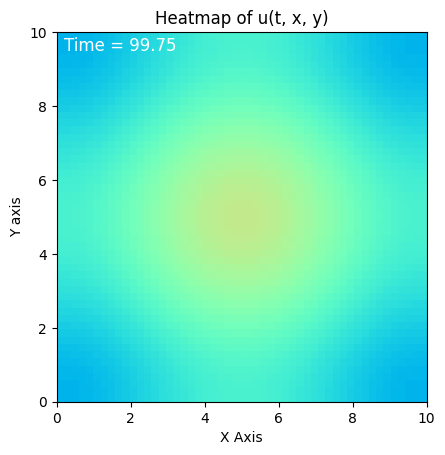

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()
heatmap = ax.imshow(turing[1][0, :, :], cmap='rainbow', extent=[0, L, 0, L])
ax.set_title('Heatmap of u(t, x, y)')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y axis')
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, color='white', fontsize=12)
dt = t/(row-1)

def init():
    heatmap.set_data(turing[1][0, :, :])
    return heatmap,

def update(frame):
    new_data =  turing[1][frame, :, :]
    heatmap.set_data(new_data)
    time_text.set_text(f'Time = {frame * dt:.2f}')  # Mostrar tiempo en segundos
    return heatmap, time_text

anim = FuncAnimation(fig, update, frames=286, interval = 40, init_func = init, blit=True)
HTML(anim.to_html5_video())

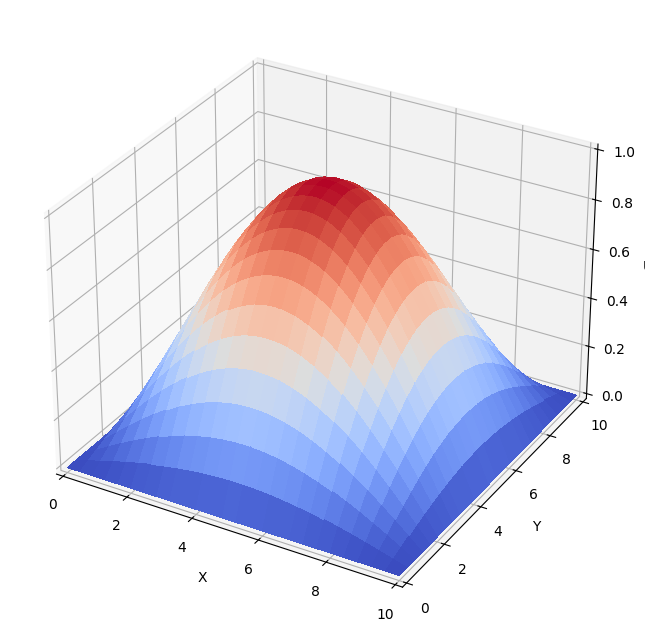

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,L])
ax.set_ylim([0,L])
ax.set_zlim([0,1])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("U")
x = np.linspace(0, L, col)
y = np.linspace(0, L, col)
X, Y = np.meshgrid(x, y)


def update(frame):
    ax.clear()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("U")
    ax.set_xlim([0,L])
    ax.set_ylim([0,L])
    ax.set_zlim([0,1])
    Z = turing[1][frame, :, :]
    surf = ax.plot_surface(X, Y, Z, cmap='coolwarm',linewidth=0, antialiased=False)
    return surf,

ani = FuncAnimation(fig, update, frames=row-1, interval = 10, blit=False)
HTML(ani.to_html5_video())

As we can see, with this function as the initial condition, the concentration of either morphogen starts at the center and disperses in all directions of the plane, leaving a uniform concentration throughout the region, as expected. We can also note the absence of reaction functions, since both morphogens have the same behavior. For this simulation a $10\times10$ grid was used, and $t = 350$.

Now with a Gaussian distribution:
$$
u(0, x, y) = \exp\left(-\frac{(x - L/2)^2 + (y - L/2)^2}{2\sigma^2}\right)
$$

$$
v(0, x, y) = \exp\left(-\frac{(x - L/2)^2 + (y - L/2)^2}{2\sigma^2}\right)
$$

with $\sigma = 2$, and center in $(L/2, L/2)$.

In [ ]:
#Libraries
import numpy as np
import sympy as sp
from math import sqrt, pi
import matplotlib.pyplot as plt
import random

def turing(row, col, L, t, d1, d2):
    h_L = L/(col-1)
    h_t = t/(row-1)
    X = np.linspace(0, L, col)
    Y = np.linspace(0, L, col)

    '''
    Rows = Time
    Columns = Space
    '''

    #Creating the cubes
    u = np.zeros((row, col, col))
    v = np.zeros((row, col, col))

    # putting the values of the first matrix
    for j in range(col):
      for k in range(col):
        u[0, j, k] = np.exp(-((X[j] - L/2)**2 + (Y[k] - L/2)**2) / (2 * 2**2))
        v[0, j, k] = np.exp(-((X[j] - L/2)**2 + (Y[k] - L/2)**2) / (2 * 2**2))

    #filling the cube
    for i in range(0, row-1):
      for j in range(1, col-1):
        for k in range(1, col-1):
          u[i+1, j, k] = u[i, j, k] + ((d1*h_t)/h_L**2)*(u[i, j-1, k] + u[i, j+1, k] + u[i, j, k-1] + u[i, j, k+1] - 4*u[i, j, k])
          v[i+1, j, k] = v[i, j, k] + ((d2*h_t)/h_L**2)*(v[i, j-1, k] + v[i, j+1, k] + v[i, j, k-1] + v[i, j, k+1] - 4*v[i, j, k])

      #Copying the values of second and penultimate column into the first and last column
      u[i+1, 0, :] = u[i+1, 1, :]
      u[i+1, -1, :] = u[i+1, -2, :]
      u[i+1, :, 0] = u[i+1, :, 1]
      u[i+1, :, -1] = u[i+1, :, -2]

      v[i+1, 0, :] = v[i+1, 1, :]
      v[i+1, -1, :] = v[i+1, -2, :]
      v[i+1, :, 0] = v[i+1, :, 1]
      v[i+1, :, -1] = v[i+1, :, -2]

    return (u, v)

#Calling the function
row = 1001
col = 51
L = 10
t = 350

d1 = 0.025
d2 = 0.025

turing = turing(row, col, L, t, d1, d2)

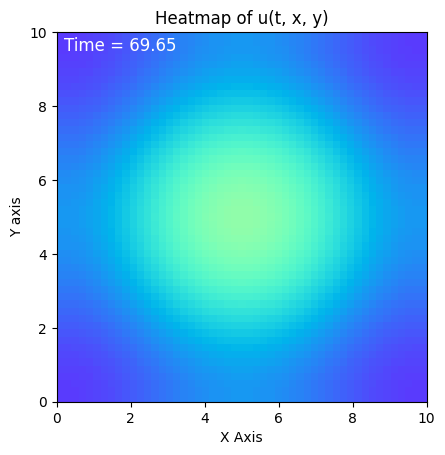

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig, ax = plt.subplots()
heatmap = ax.imshow(turing[1][0, :, :], cmap='rainbow', extent=[0, L, 0, L])
ax.set_title('Heatmap of u(t, x, y)')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y axis')
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes, color='white', fontsize=12)
dt = t/(row-1)

def init():
    heatmap.set_data(turing[1][0, :, :])
    return heatmap,

def update(frame):
    new_data =  turing[1][frame, :, :]
    heatmap.set_data(new_data)
    time_text.set_text(f'Time = {frame * dt:.2f}')  # Mostrar tiempo en segundos
    return heatmap, time_text

anim = FuncAnimation(fig, update, frames=200, interval = 50, init_func = init, blit=True)
HTML(anim.to_html5_video())

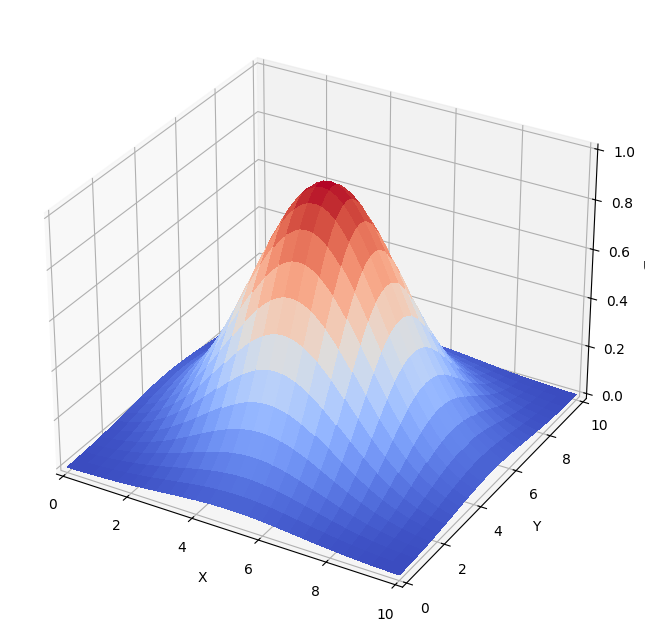

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,L])
ax.set_ylim([0,L])
ax.set_zlim([0,1])
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("U")
x = np.linspace(0, L, col)
y = np.linspace(0, L, col)
X, Y = np.meshgrid(x, y)


def update(frame):
    ax.clear()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("U")
    ax.set_xlim([0,L])
    ax.set_ylim([0,L])
    ax.set_zlim([0,1])
    Z = turing[1][frame, :, :]
    surf = ax.plot_surface(X, Y, Z, cmap='coolwarm',linewidth=0, antialiased=False)
    return surf,

ani = FuncAnimation(fig, update, frames=row-1, interval = 10, blit=False)
HTML(ani.to_html5_video())

we can see a similar behavior, except that the Gaussian function had a higher peak, but as time goes on, the concentration of both morphogens ends up being uniform in the region.

###**4. Full Solution (Spectral Method)**

The main reason why this method was used for the full solution and not Finite Differences Method was that the error decreases exponentially with finer discretization and since the fast Fourier transform (FFT) can be used the computational effort is significantly decreased.

The solution for the equation will be the following:

$$u(x, y, t) = \sum_{n} \sum_{m} \hat{u}_{nm}(t) \, \varphi_n(x) \, \psi_m(y)$$

With:

$$\varphi_n(x) = e^{2 \pi i n x / L_x}, \quad \psi_m(y) = e^{2 \pi i m y / L_y}$$

Where $\varphi_n(x)$ and $\psi_m(y)$ are the complex harmonic basis functions. Since they are periodic it implies periodic boundary conditions on the solution.

The discrete Fourier transform and its inverse are defined as follows:

$$u_{jk} = \mathcal{F}^{-1} \{ \hat{u}_{nm} \} =
\sum_{n = -N/2 + 1}^{N/2} \sum_{m = -M/2 + 1}^{M/2}
\hat{u}_{nm} \, e^{2 \pi i n j / N} \, e^{2 \pi i m k / M}$$

$$\hat{u}_{nm} = \mathcal{F} \{ u_{jk} \} =
\frac{1}{NM} \sum_{j = 0}^{N - 1} \sum_{k = 0}^{M - 1}
u_{jk} \, e^{-2 \pi i n j / N} \, e^{-2 \pi i m k / M}$$

Identifying the right-hand side with the inverse Fourier tranform, the expresion is simplified to:

$$\frac{\partial u_{jk}}{\partial t} = \mathcal{F}^{-1}
\left\{ \left( \frac{2 \pi i n}{L_x} \right)^2 + \left( \frac{2 \pi i m}{L_y} \right)^2 \right\}
\mathcal{F} \{ u_{jk} \}$$

The discrete equation for $u$ and $v$ will end up being the following ones:

$$\frac{\partial u_{jk}}{\partial t} = D_u \mathcal{F}^{-1}
\left\{ \left( \frac{2 \pi i n}{L_x} \right)^2 + \left( \frac{2 \pi i m}{L_y} \right)^2 \right\}
\mathcal{F} \{ u_{jk} \} + f(u_{jk}, v_{jk})$$

$$\frac{\partial v_{jk}}{\partial t} = D_v \mathcal{F}^{-1}
\left\{ \left( \frac{2 \pi i n}{L_x} \right)^2 + \left( \frac{2 \pi i m}{L_y} \right)^2 \right\}
\mathcal{F} \{ v_{jk} \} + g(u_{jk}, v_{jk})$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2

####*Spots Pattern*

\begin{array}{|c|c|c|}
\hline
\textbf{Parameter} & \textbf{Value}\\
\hline
c_1 & 0  \\
c_2 & 0.5\\
c_3 & 0.5 \\
c_4 & 0.5 \\
c_5 & 0.45  \\
k & 0.081  \\
Du & 0.1 \\
Dv & 2.0  \\
\hline
\end{array}



In [ ]:
# Parameters for model and grid
Lx, Ly = 30, 30         # Physical grid dimensions
Du, Dv = 0.1, 2.0       # Diffusion coefficients for u and v
T = 2000                # Total number of time steps
dt = 0.1                # Time step size
h = 1.0                 # Spatial grid spacing

# Gierer-Meinhardt model parameters
c1, c2, c3, c4, c5 = 0, 0.5, 0.5, 0.5, 0.45
k = 0.081                # Reaction rate parameter for Gierer-Meinhardt

# Set up the spatial grid
nx, ny = 50, 50         # Reduced number of grid points
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

def initialize_grid(nx, ny):
    """Initialize u and v with small random perturbations."""
    u = 1 + 0.1 * np.random.rand(nx, ny)
    v = 1 + 0.1 * np.random.rand(nx, ny)
    return u, v

def reaction_terms(u, v):
    """Calculate reaction terms for the Gierer-Meinhardt model."""
    epsilon = 1e-10  # Small constant to avoid division by zero
    reaction_u = c1 - c2 * u + (c3 * u**2 / ((1 + k * u**2) * (v + epsilon)))
    reaction_v = c4 * u**2 - c5 * v
    return reaction_u, reaction_v

def fft_spectral_solver(u, v):
    """Perform FFT-based spectral method to solve the reaction-diffusion equations."""
    # Wavenumbers for FFT in x and y directions
    kx = 2 * np.pi * np.fft.fftfreq(nx, d=h)
    ky = 2 * np.pi * np.fft.fftfreq(ny, d=h)
    KX, KY = np.meshgrid(kx, ky)
    K2 = KX**2 + KY**2

    u_evolution = []  # To store the evolution of u
    v_evolution = []  # To store the evolution of v

    # Time evolution loop
    for t in range(T):
        # Compute reaction terms in real space
        u_react, v_react = reaction_terms(u, v)

        # Transform u and v to Fourier space
        u_hat = fft2(u)
        v_hat = fft2(v)

        # Update in Fourier space using diffusion and reaction terms
        u_hat = (u_hat + dt * fft2(u_react)) / (1 + dt * Du * K2)
        v_hat = (v_hat + dt * fft2(v_react)) / (1 + dt * Dv * K2)

        # Transform back to real space
        u = np.real(ifft2(u_hat))
        v = np.real(ifft2(v_hat))

        # Store the current states of u and v every 50 time steps
        if t % 200 == 0:  # Store every 50 time steps for visualization
            u_evolution.append(u)
            v_evolution.append(v)

    return u_evolution, v_evolution

def plot_results(u, v):
    """Plot the final patterns of u and v."""
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].imshow(u, cmap='viridis', extent=[0, Lx, 0, Ly])
    axs[0].set_title('Activator (u) pattern')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[1].imshow(v, cmap='plasma', extent=[0, Lx, 0, Ly])
    axs[1].set_title('Inhibitor (v) pattern')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    plt.colorbar(axs[0].images[0], ax=axs[0], orientation='horizontal')
    plt.colorbar(axs[1].images[0], ax=axs[1], orientation='horizontal')
    plt.tight_layout()
    plt.show()

def plot_results2(u_evolution, v_evolution):
    """Plot the evolution of patterns for u and v."""
    num_frames = len(u_evolution)
    fig, axs = plt.subplots(num_frames, 2, figsize=(8, 2 * num_frames))

    if num_frames == 1:
        axs = [axs]  # Ensure axs is a 2D array if there's only one frame

    for i, (u, v) in enumerate(zip(u_evolution, v_evolution)):
        axs[i][0].imshow(u, cmap='viridis', extent=[0, Lx, 0, Ly])
        axs[i][0].set_title(f'Activator (u) at t={i*50}')
        axs[i][0].set_xlabel('x')
        axs[i][0].set_ylabel('y')
        axs[i][1].imshow(v, cmap='plasma', extent=[0, Lx, 0, Ly])
        axs[i][1].set_title(f'Inhibitor (v) at t={i*50}')
        axs[i][1].set_xlabel('x')
        axs[i][1].set_ylabel('y')

    plt.tight_layout()
    plt.show()

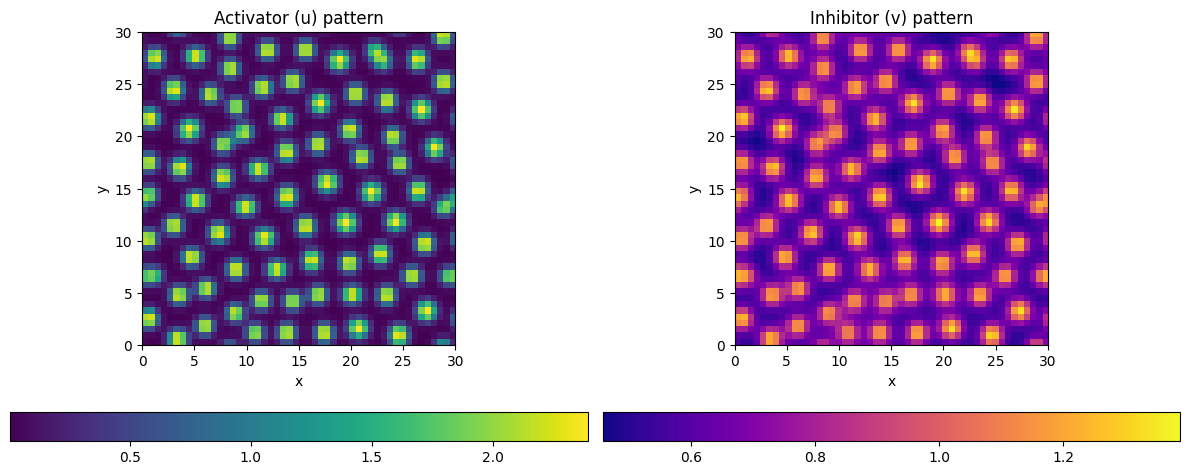

In [ ]:
u, v = initialize_grid(nx, ny)
u_final, v_final = fft_spectral_solver(u, v)
plot_results(u_final[-1], v_final[-1])

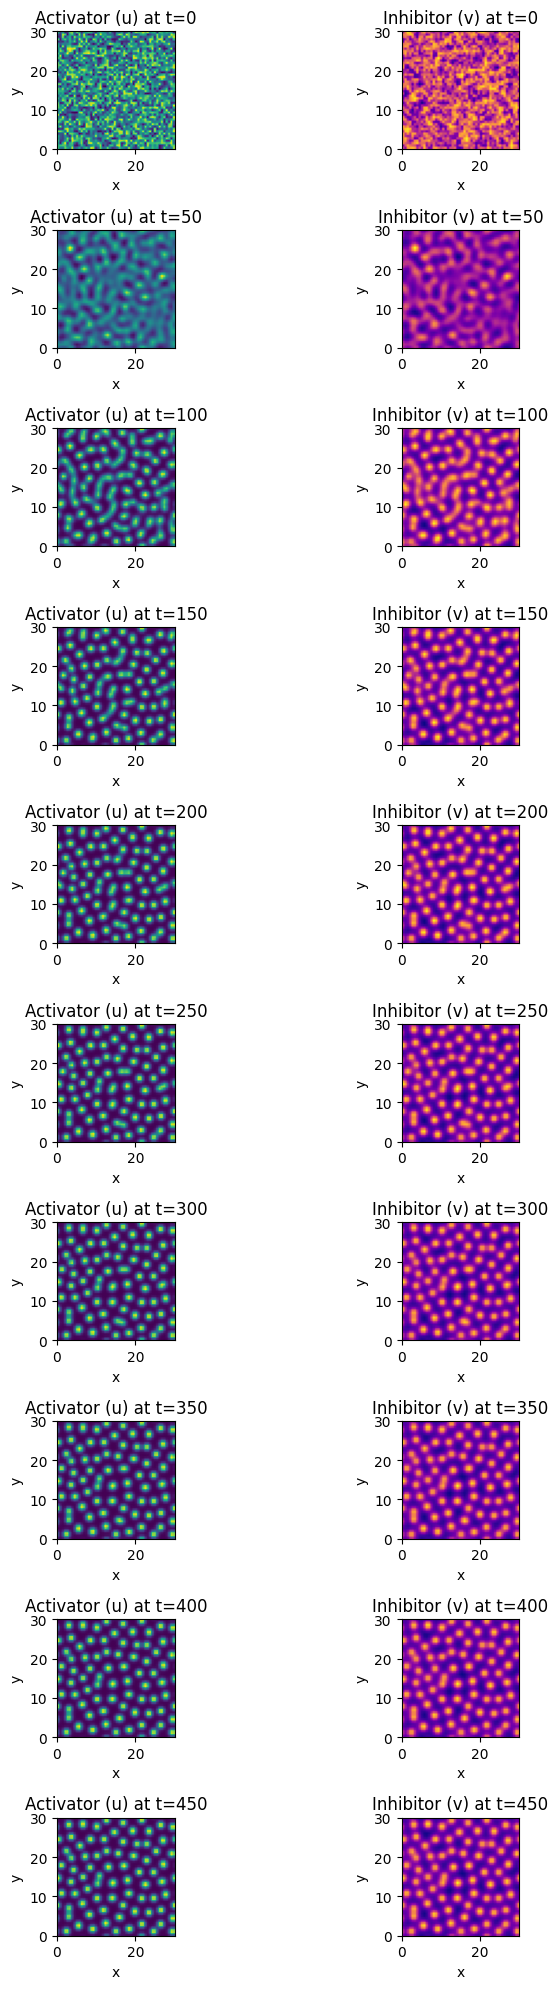

In [ ]:
u, v = initialize_grid(nx, ny)
u_evolution, v_evolution = fft_spectral_solver(u, v)
plot_results2(u_evolution, v_evolution)

####*Snake-like Pattern*

\begin{array}{|c|c|c|}
\hline
\textbf{Parameter} & \textbf{Value}\\
\hline
c_1 & 0.05  \\
c_2 & 0.5\\
c_3 & 0.5 \\
c_4 & 0.6 \\
c_5 & 0.45  \\
k & 0.081  \\
Du & 0.1 \\
Dv & 1.5  \\
\hline
\end{array}


In [ ]:
# Parameters for model and grid
Lx, Ly = 30, 30         # Physical grid dimensions
Du, Dv = 0.1, 1.5       # Diffusion coefficients for u and v
T = 2000                # Total number of time steps
dt = 0.1                # Time step size
h = 1.0                 # Spatial grid spacing

# Gierer-Meinhardt model parameters
c1, c2, c3, c4, c5 = 0.05, 0.5, 0.5, 0.6, 0.45
k = 0.081                # Reaction rate parameter for Gierer-Meinhardt

# Set up the spatial grid
nx, ny = 50, 50         # Reduced number of grid points
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

def initialize_grid(nx, ny):
    """Initialize u and v with small random perturbations."""
    u = 1 + 0.1 * np.random.rand(nx, ny)
    v = 1 + 0.1 * np.random.rand(nx, ny)
    return u, v

def reaction_terms(u, v):
    """Calculate reaction terms for the Gierer-Meinhardt model."""
    epsilon = 1e-10  # Small constant to avoid division by zero
    reaction_u = c1 - c2 * u + (c3 * u**2 / ((1 + k * u**2) * (v + epsilon)))
    reaction_v = c4 * u**2 - c5 * v
    return reaction_u, reaction_v

def fft_spectral_solver(u, v):
    """Perform FFT-based spectral method to solve the reaction-diffusion equations."""
    # Wavenumbers for FFT in x and y directions
    kx = 2 * np.pi * np.fft.fftfreq(nx, d=h)
    ky = 2 * np.pi * np.fft.fftfreq(ny, d=h)
    KX, KY = np.meshgrid(kx, ky)
    K2 = KX**2 + KY**2

    u_evolution = []  # To store the evolution of u
    v_evolution = []  # To store the evolution of v

    # Time evolution loop
    for t in range(T):
        # Compute reaction terms in real space
        u_react, v_react = reaction_terms(u, v)

        # Transform u and v to Fourier space
        u_hat = fft2(u)
        v_hat = fft2(v)

        # Update in Fourier space using diffusion and reaction terms
        u_hat = (u_hat + dt * fft2(u_react)) / (1 + dt * Du * K2)
        v_hat = (v_hat + dt * fft2(v_react)) / (1 + dt * Dv * K2)

        # Transform back to real space
        u = np.real(ifft2(u_hat))
        v = np.real(ifft2(v_hat))

        # Store the current states of u and v every 50 time steps
        if t % 200 == 0:  # Store every 50 time steps for visualization
            u_evolution.append(u)
            v_evolution.append(v)

    return u_evolution, v_evolution

def plot_results(u, v):
    """Plot the final patterns of u and v."""
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].imshow(u, cmap='viridis', extent=[0, Lx, 0, Ly])
    axs[0].set_title('Activator (u) pattern')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[1].imshow(v, cmap='plasma', extent=[0, Lx, 0, Ly])
    axs[1].set_title('Inhibitor (v) pattern')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    plt.colorbar(axs[0].images[0], ax=axs[0], orientation='horizontal')
    plt.colorbar(axs[1].images[0], ax=axs[1], orientation='horizontal')
    plt.tight_layout()
    plt.show()

def plot_results2(u_evolution, v_evolution):
    """Plot the evolution of patterns for u and v."""
    num_frames = len(u_evolution)
    fig, axs = plt.subplots(num_frames, 2, figsize=(8, 2 * num_frames))

    if num_frames == 1:
        axs = [axs]  # Ensure axs is a 2D array if there's only one frame

    for i, (u, v) in enumerate(zip(u_evolution, v_evolution)):
        axs[i][0].imshow(u, cmap='viridis', extent=[0, Lx, 0, Ly])
        axs[i][0].set_title(f'Activator (u) at t={i*50}')
        axs[i][0].set_xlabel('x')
        axs[i][0].set_ylabel('y')
        axs[i][1].imshow(v, cmap='plasma', extent=[0, Lx, 0, Ly])
        axs[i][1].set_title(f'Inhibitor (v) at t={i*50}')
        axs[i][1].set_xlabel('x')
        axs[i][1].set_ylabel('y')

    plt.tight_layout()
    plt.show()

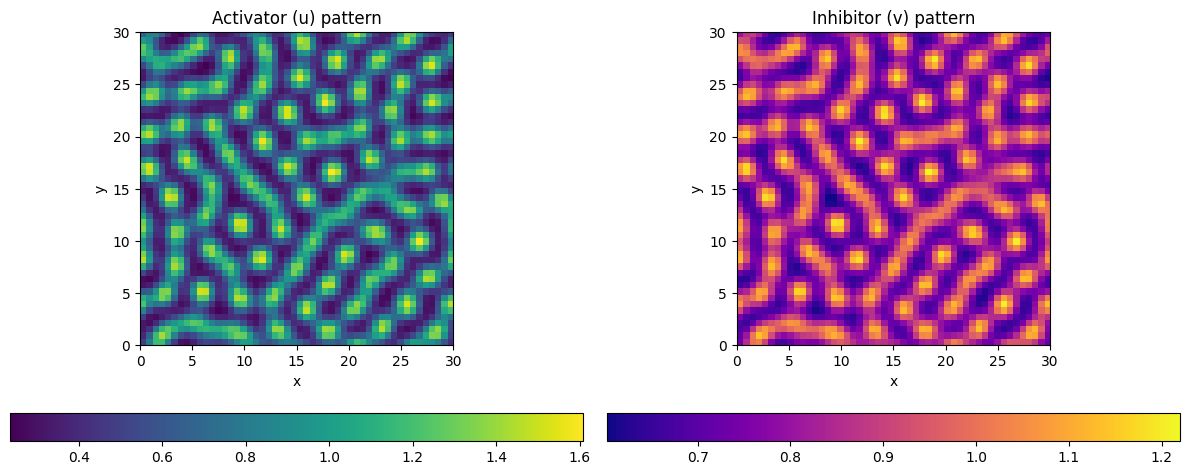

In [ ]:
u, v = initialize_grid(nx, ny)
u_final, v_final = fft_spectral_solver(u, v)
plot_results(u_final[-1], v_final[-1])

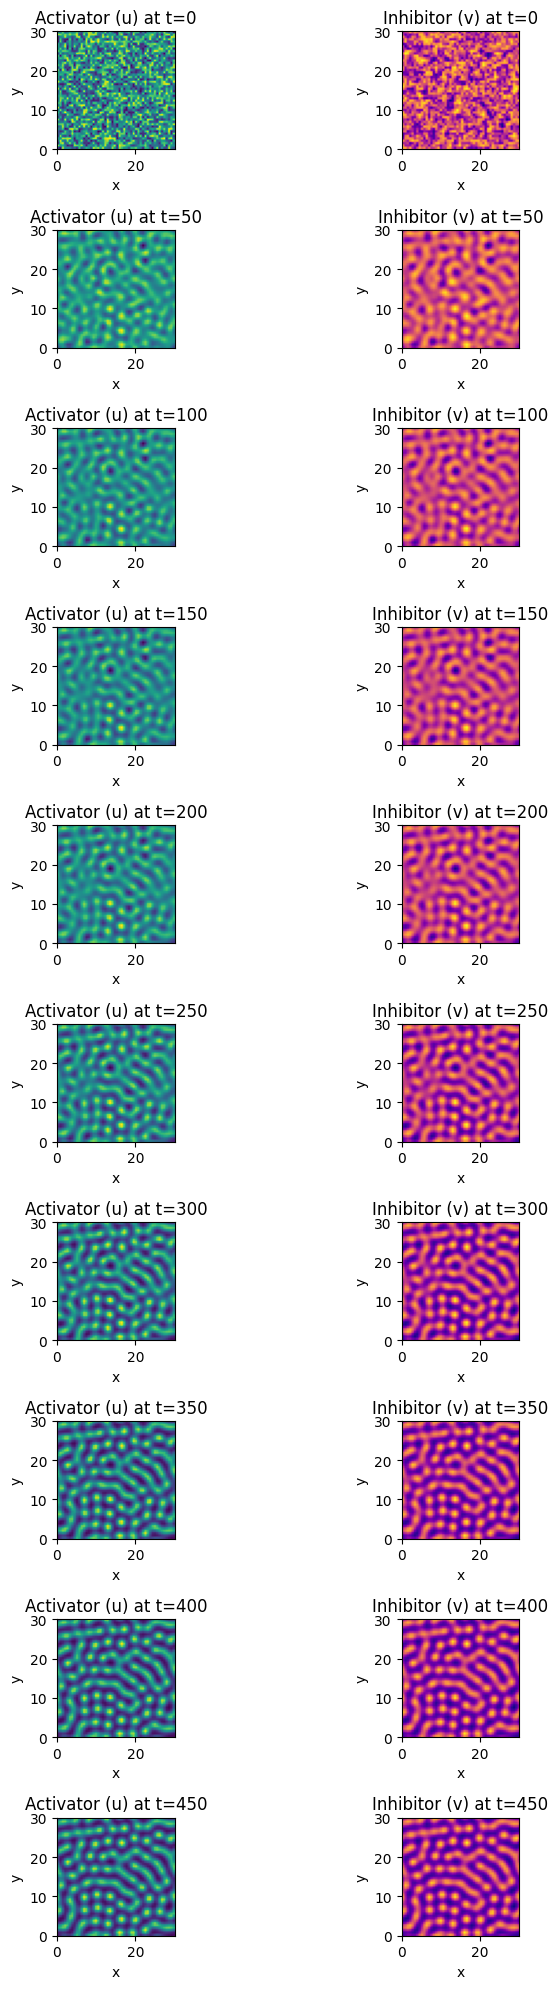

In [ ]:
u, v = initialize_grid(nx, ny)
u_evolution, v_evolution = fft_spectral_solver(u, v)
plot_results2(u_evolution, v_evolution)

####*Honeycomb Pattern*

\begin{array}{|c|c|c|}
\hline
\textbf{Parameter} & \textbf{Value}\\
\hline
c_1 & 0  \\
c_2 & 0.5\\
c_3 & 0.5 \\
c_4 & 0.5 \\
c_5 & 0.45  \\
k & 0.081  \\
Du & 0.1 \\
Dv & 0.8  \\
\hline
\end{array}


In [ ]:
# Parameters for model and grid
Lx, Ly = 30, 30         # Physical grid dimensions
Du, Dv = 0.1, 0.8       # Diffusion coefficients for u and v
T = 2000                # Total number of time steps
dt = 0.1                # Time step size
h = 1.0                 # Spatial grid spacing

# Gierer-Meinhardt model parameters
c1, c2, c3, c4, c5 = 0, 0.5, 0.5, 0.5, 0.45
k = 0.081                # Reaction rate parameter for Gierer-Meinhardt

# Set up the spatial grid
nx, ny = 50, 50         # Reduced number of grid points
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)

def initialize_grid(nx, ny):
    """Initialize u and v with small random perturbations."""
    u = 1 + 0.1 * np.random.rand(nx, ny)
    v = 1 + 0.1 * np.random.rand(nx, ny)
    return u, v

def reaction_terms(u, v):
    """Calculate reaction terms for the Gierer-Meinhardt model."""
    epsilon = 1e-10  # Small constant to avoid division by zero
    reaction_u = c1 - c2 * u + (c3 * u**2 / ((1 + k * u**2) * (v + epsilon)))
    reaction_v = c4 * u**2 - c5 * v
    return reaction_u, reaction_v

def fft_spectral_solver(u, v):
    """Perform FFT-based spectral method to solve the reaction-diffusion equations."""
    # Wavenumbers for FFT in x and y directions
    kx = 2 * np.pi * np.fft.fftfreq(nx, d=h)
    ky = 2 * np.pi * np.fft.fftfreq(ny, d=h)
    KX, KY = np.meshgrid(kx, ky)
    K2 = KX**2 + KY**2

    u_evolution = []  # To store the evolution of u
    v_evolution = []  # To store the evolution of v

    # Time evolution loop
    for t in range(T):
        # Compute reaction terms in real space
        u_react, v_react = reaction_terms(u, v)

        # Transform u and v to Fourier space
        u_hat = fft2(u)
        v_hat = fft2(v)

        # Update in Fourier space using diffusion and reaction terms
        u_hat = (u_hat + dt * fft2(u_react)) / (1 + dt * Du * K2)
        v_hat = (v_hat + dt * fft2(v_react)) / (1 + dt * Dv * K2)

        # Transform back to real space
        u = np.real(ifft2(u_hat))
        v = np.real(ifft2(v_hat))

        # Store the current states of u and v every 50 time steps
        if t % 200 == 0:  # Store every 50 time steps for visualization
            u_evolution.append(u)
            v_evolution.append(v)

    return u_evolution, v_evolution

def plot_results(u, v):
    """Plot the final patterns of u and v."""
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].imshow(u, cmap='viridis', extent=[0, Lx, 0, Ly])
    axs[0].set_title('Activator (u) pattern')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    axs[1].imshow(v, cmap='plasma', extent=[0, Lx, 0, Ly])
    axs[1].set_title('Inhibitor (v) pattern')
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y')
    plt.colorbar(axs[0].images[0], ax=axs[0], orientation='horizontal')
    plt.colorbar(axs[1].images[0], ax=axs[1], orientation='horizontal')
    plt.tight_layout()
    plt.show()

def plot_results2(u_evolution, v_evolution):
    """Plot the evolution of patterns for u and v."""
    num_frames = len(u_evolution)
    fig, axs = plt.subplots(num_frames, 2, figsize=(8, 2 * num_frames))

    if num_frames == 1:
        axs = [axs]  # Ensure axs is a 2D array if there's only one frame

    for i, (u, v) in enumerate(zip(u_evolution, v_evolution)):
        axs[i][0].imshow(u, cmap='viridis', extent=[0, Lx, 0, Ly])
        axs[i][0].set_title(f'Activator (u) at t={i*50}')
        axs[i][0].set_xlabel('x')
        axs[i][0].set_ylabel('y')
        axs[i][1].imshow(v, cmap='plasma', extent=[0, Lx, 0, Ly])
        axs[i][1].set_title(f'Inhibitor (v) at t={i*50}')
        axs[i][1].set_xlabel('x')
        axs[i][1].set_ylabel('y')

    plt.tight_layout()
    plt.show()

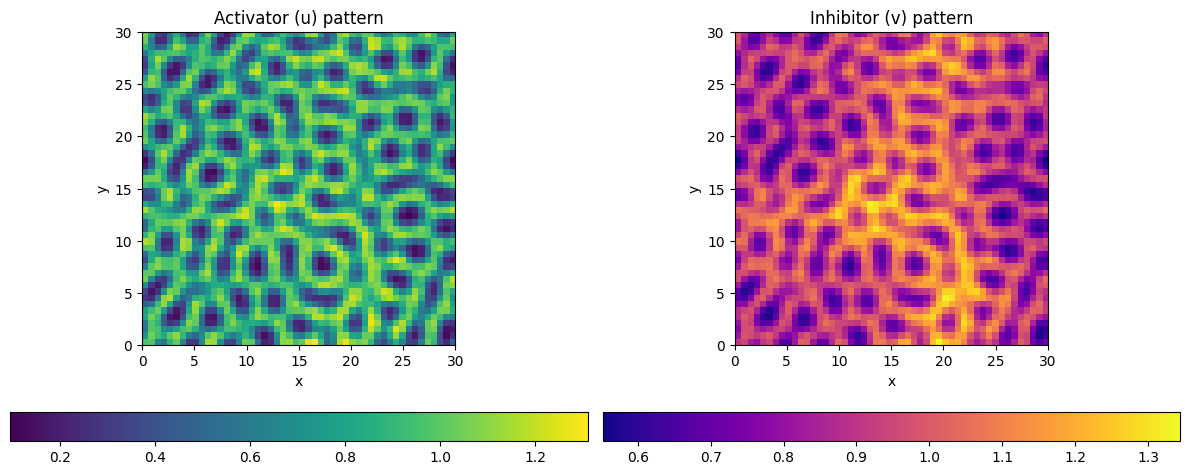

In [ ]:
u, v = initialize_grid(nx, ny)
u_final, v_final = fft_spectral_solver(u, v)
plot_results(u_final[-1], v_final[-1])

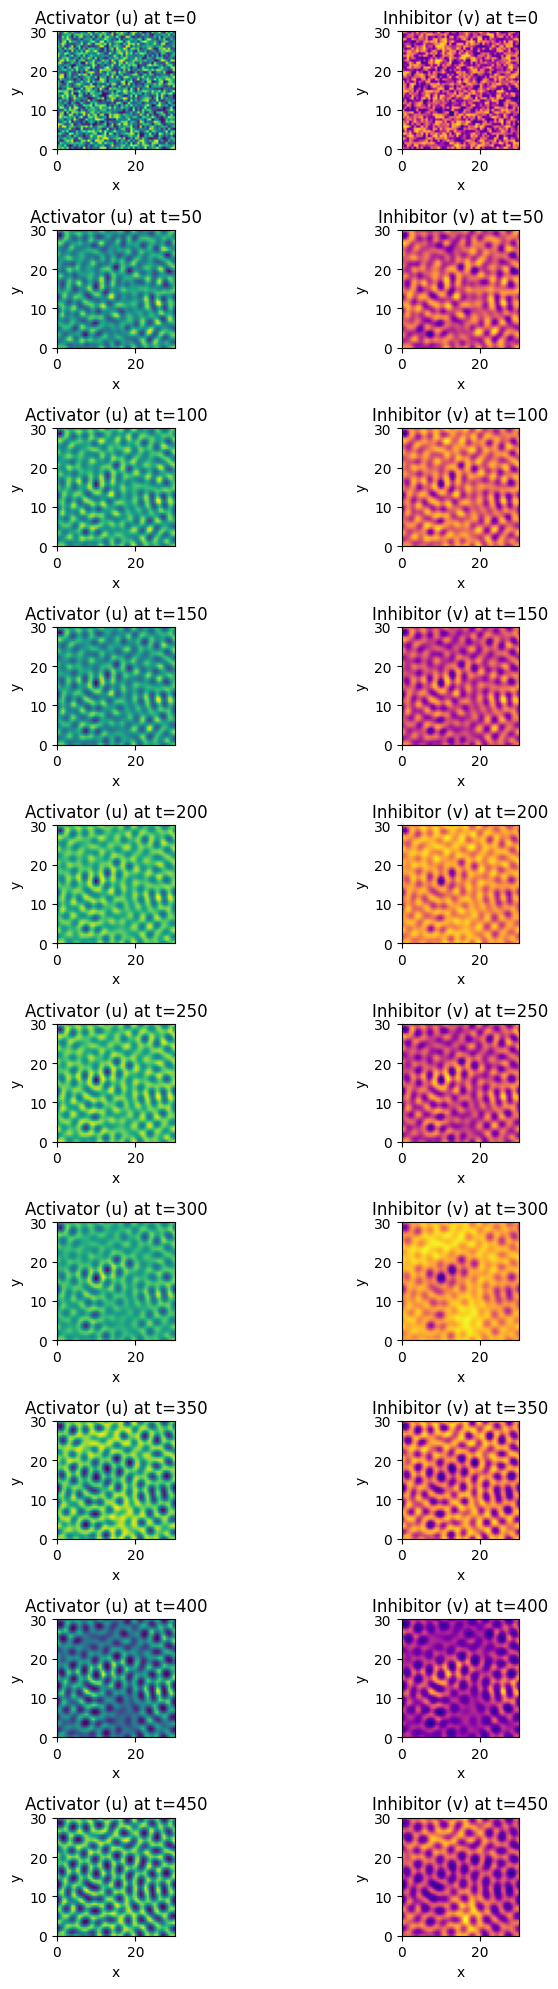

In [ ]:
u, v = initialize_grid(nx, ny)
u_evolution, v_evolution = fft_spectral_solver(u, v)
plot_results2(u_evolution, v_evolution)

It is evident that if the values of each parameter are changed, different patterns will emerged due to the dynamics of the system changing. This means that certain values will generate more connected structures while others will lead to generate more scattered patterns.

The activator $u$ has a self-activating property that allows it to accumulate in small regions, while the inhibitor $v$ suppresses the growth of $u$ outside of these regions, leading to a pattern of isolated spots.

The size and number of spots are influenced by the balance between the reaction rates $c_1, c_2, c_3, c_4, c_5$ and diffusion coefficients $D_u, D_v$. A higher value of the inhibitor diffusion $D_v$ or lower activator self-activation $c_3$ can lead to fewer spots or larger regions of activator.

###**5. References**


[1]   OSKAR FALGÉN NIKULA, OSKAR FORSSTRÖM. (2022). Turing's model for pattern formation. A study of pattern characteristics and minimal energy control. Retrieved from https://www.diva-portal.org/smash/get/diva2:1678936/FULLTEXT01.pdf

[2]   Stack Overflow. (2023, August 18). Generating Turing patterns using finite difference on reaction-diffusion equations. Stack Overflow. https://stackoverflow.com/questions/77427729/generating-turing-patterns-using-finite-difference-on-reaction-diffusion-equatio

[3] VisualPDE. (n.d.). Gierer-Meinhardt model. VisualPDE. https://visualpde.com/mathematical-biology/gierer-meinhardt.html

[4]   Barr, I. J. M. (n.d.). Turing patterns. GitHub. https://github.com/ijmbarr/turing-patterns/blob/master/turing-patterns.ipynb

Since the expected solutions for this project have been obtained, it is expected that the teacher will provide feedback on the results obtained and then present them to the class.